In [3]:
!pip install emoji

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
df = pd.read_csv("spam.csv") #write your own file path
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
#check null values
df.isnull().sum()

,0
Category,0
Message,0


In [8]:
print(df['Category'].value_counts())

Category
ham     4825
spam     747
Name: count, dtype: int64


In [9]:
#find duplicates and drop (inplace=True
print("No , Null values")

df_dropped=df.drop(df[df.duplicated()].index,axis=0)

No , Null values


In [10]:
#now it should be false
df_dropped.duplicated().any()

np.False_

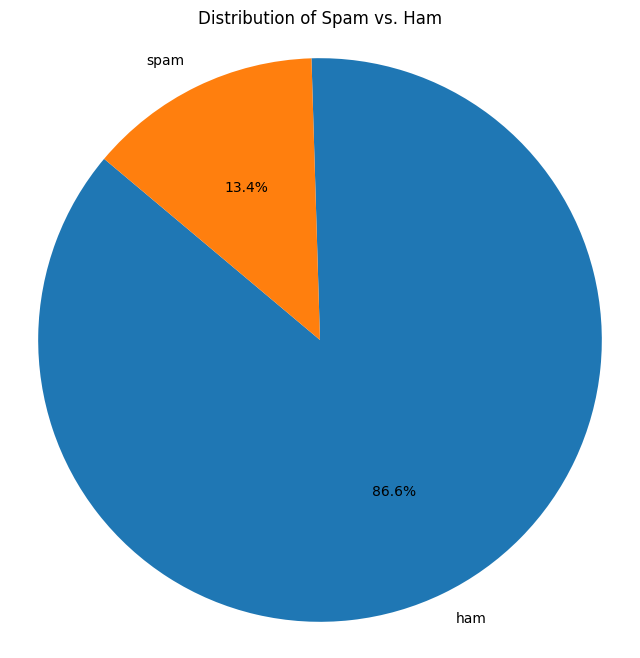

In [11]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

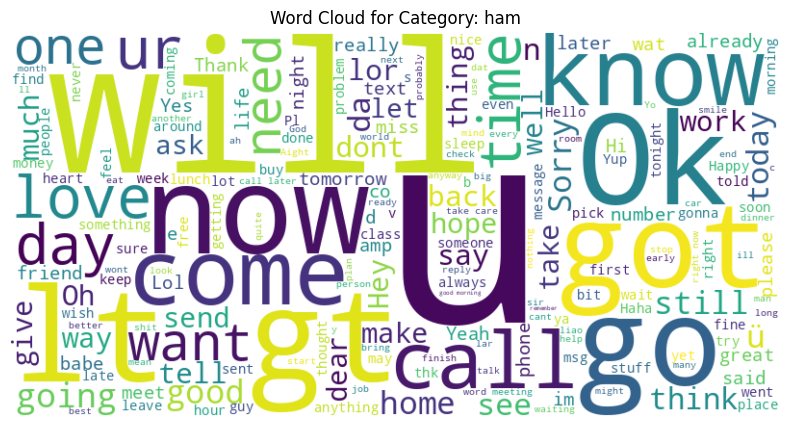

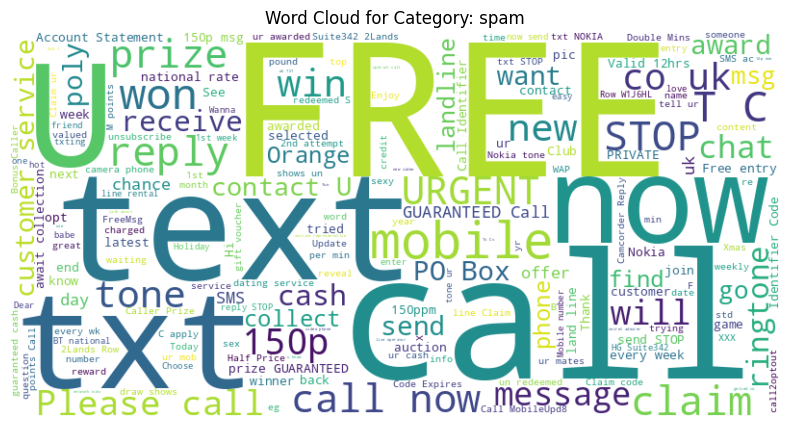

In [12]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [13]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [14]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [15]:
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].apply(lambda x: ' '.join(x.split()))
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [16]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    df_cleaned = re.sub(r'<.*?>', '', text)
    return df_cleaned

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)

In [17]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [18]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    df_cleaned = re.sub(r'http\S+|www\S+|https\S+', '', str(text))
    return df_cleaned

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)

In [19]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will ü b going to esplanade fr home?
5569,0,"pity, * was in mood for that. so...any other s..."
5570,0,the guy did some bitching but i acted like i'd...


In [20]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    df_cleaned = re.sub(pattern, '', str(text))
    return df_cleaned

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [21]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [22]:
def remove_numeric_preserve_na(text):
    if pd.isna(text):
        return text

    s = str(text)
    s = re.sub(r'\d+', '', s)
    return s

df['Message'] = df['Message'].apply(remove_numeric_preserve_na)

In [23]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggest...
5570,0,the guy did some bitching but i acted like id ...


In [24]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    pattern = r'[^a-zA-Z0-9\s]'
    df_cleaned = re.sub(pattern, '', str(text))
    return df_cleaned

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [25]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [26]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    replaced_words = [chat_words.get(word, word) for word in words]
    return ' '.join(replaced_words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [27]:
df

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,1,this is the nd time we have tried contact u u ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that soany other suggestions
5570,0,the guy did some bitching but i acted like id ...


In [28]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
df

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [30]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

In [31]:
df

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5567,1,nd time tried contact u u pound prize claim ea...
5568,0,b going esplanade fr home
5569,0,pity mood soany suggestions
5570,0,guy bitching acted like id interested buying s...


In [32]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though


In [33]:
df

,Category,Message,Message_stemmed
0,0,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,ok lar joking wif u oni,ok lar joke wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,0,nah dont think goes usf lives around though,nah dont think goe usf live around though
...,...,...,...
5567,1,nd time tried contact u u pound prize claim ea...,nd time tri contact u u pound prize claim easi...
5568,0,b going esplanade fr home,b go esplanad fr home
5569,0,pity mood soany suggestions,piti mood soani suggest
5570,0,guy bitching acted like id interested buying s...,guy bitch act like id interest buy someth els ...


In [34]:
# --- Count Vectorizer ---
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

# Split data (Count)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(
    X_count, y, test_size=0.3, random_state=42
)

# Convert y to numpy arrays
y_train_count = y_train_count.values
y_test_count = y_test_count.values


# --- TF-IDF Vectorizer ---
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Message_stemmed'])

# Split data (TF-IDF)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

# Convert y to numpy arrays
y_train_tfidf = y_train_tfidf.values
y_test_tfidf = y_test_tfidf.values

In [39]:
scaler = StandardScaler(with_mean=False)   # safer for sparse data
X_train_count_scaled = scaler.fit_transform(X_train_count)
X_test_count_scaled = scaler.transform(X_test_count)
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)
X_train_tfidf_scaled = X_train_tfidf_scaled.toarray()
X_test_tfidf_scaled  = X_test_tfidf_scaled.toarray()

#Solve this problem using Logistic Regression(using numpy from scratch)

In [45]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, l2_lambda=0.1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.l2_lambda = l2_lambda   # strength of L2 regularisation
        self.w = None
        self.b = None
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Handle sparse input (TF-IDF/CountVectorizer output)
        if hasattr(X, "toarray"):
            X = X.toarray()

        m, n = X.shape
        y = y.reshape(-1, 1)   # Ensure column vector

        self.w = np.zeros((n, 1))
        self.b = 0

        for i in range(self.epochs):
            # Forward pass
            z = np.dot(X, self.w) + self.b
            y_hat = self.sigmoid(z)

            # Cost with L2 penalty
            cost = -(1/m) * np.sum(
                y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)
            ) + (self.l2_lambda / (2*m)) * np.sum(self.w ** 2)

            # Gradients with L2 term
            dw = (1/m) * np.dot(X.T, (y_hat - y)) + (self.l2_lambda / m) * self.w
            db = (1/m) * np.sum(y_hat - y)   # bias not regularised

            # Update weights
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            # Track cost
            if i % 100 == 0:
                self.costs.append(cost)
                print(f"Epoch {i}, Cost: {cost:.4f}")

    def predict(self, X):
        if hasattr(X, "toarray"):
            X = X.toarray()
        z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(z)
        return (y_hat > 0.5).astype(int)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred.reshape(-1) == y.reshape(-1)) * 100


In [46]:
# Train model Using CountVectorizer.
print("Using the CountVectorizer")
logisticsReg = LogisticRegressionScratch()
logisticsReg.fit(X_train_count_scaled, y_train_count)
y_train_pred_count = logisticsReg.predict(X_train_count_scaled)
y_test_pred_count = logisticsReg.predict(X_test_count_scaled)

print('\n')
print("This is using the TfidfVectorizer")
# Train model Using TfidfVectorizer.
logisticsReg.fit(X_train_tfidf_scaled, y_train_tfidf)
y_train_pred_tfidf = logisticsReg.predict(X_train_tfidf_scaled)
y_test_pred_tfidf = logisticsReg.predict(X_test_tfidf_scaled)

Using the CountVectorizer
Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.2334
Epoch 200, Cost: 0.1497
Epoch 300, Cost: 0.1124
Epoch 400, Cost: 0.0909
Epoch 500, Cost: 0.0768
Epoch 600, Cost: 0.0668
Epoch 700, Cost: 0.0592
Epoch 800, Cost: 0.0534
Epoch 900, Cost: 0.0487


This is using the TfidfVectorizer
Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.2054
Epoch 200, Cost: 0.1217
Epoch 300, Cost: 0.0871
Epoch 400, Cost: 0.0680
Epoch 500, Cost: 0.0560
Epoch 600, Cost: 0.0477
Epoch 700, Cost: 0.0416
Epoch 800, Cost: 0.0369
Epoch 900, Cost: 0.0332


In [47]:
#Model Performance.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("This is model performances according to countVectorization\n")
# 1. Accuracy
print("Train Accuracy:", accuracy_score(y_train_count, y_train_pred_count))
print("Test Accuracy:", accuracy_score(y_test_count, y_test_pred_count))

# 2. Confusion Matrix
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test_count, y_test_pred_count))

# 3. Classification Report (Precision, Recall, F1-score)
print("\nClassification Report (Test):")
print(classification_report(y_test_count, y_test_pred_count))

print("\n ----------------------------------------------------\n")

print("\nNow using TfidfVectorizer\n")
# 1. Accuracy
print("Train Accuracy:", accuracy_score(y_train_tfidf, y_train_pred_tfidf))
print("Test Accuracy:", accuracy_score(y_test_tfidf, y_test_pred_tfidf))

# 2. Confusion Matrix
print("\nConfusion Matrix (Test):")
print(confusion_matrix(y_test_tfidf, y_test_pred_tfidf))

# 3. Classification Report (Precision, Recall, F1-score)
print("\nClassification Report (Test):")
print(classification_report(y_test_tfidf, y_test_pred_tfidf))

This is model performances according to countVectorization

Train Accuracy: 0.9987179487179487
Test Accuracy: 0.9796650717703349

Confusion Matrix (Test):
[[1448    0]
 [  34  190]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       1.00      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672


 ----------------------------------------------------


Now using TfidfVectorizer

Train Accuracy: 0.9994871794871795
Test Accuracy: 0.9778708133971292

Confusion Matrix (Test):
[[1443    5]
 [  32  192]]

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.97      0.86      0.91       224

    accuracy                           0.98      1672
   ma

In [ ]:
#Experiment-4.
#Using Naive bayes.
class MultinomialNaiveBayes:
    def __init__(self, alpha=1.0):  # Laplace smoothing
        self.alpha = alpha
        self.classes = None
        self.class_log_prior_ = None
        self.feature_log_prob_ = None

    def fit(self, X, y):
        """Fit multinomial NB on count/tfidf features (X: sparse or dense, shape [n_samples, n_features])"""
        X = np.array(X)
        n_samples, n_features = X.shape
        self.classes, counts = np.unique(y, return_counts=True)
        n_classes = len(self.classes)

        # Priors
        self.class_log_prior_ = np.log(counts / n_samples)

        # Likelihood: P(word | class)
        smoothed_fc = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            word_counts = np.sum(X_c, axis=0) + self.alpha
            total_count = np.sum(word_counts)
            smoothed_fc.append(np.log(word_counts / total_count))
        self.feature_log_prob_ = np.array(smoothed_fc)

    def _predict_single(self, x):
        # log(P(class)) + sum(log(P(word|class))*count)
        log_probs = self.class_log_prior_ + x @ self.feature_log_prob_.T
        return self.classes[np.argmax(log_probs)]

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_single(x) for x in X])

    def evaluate(self, y_true, y_pred):
        return {
            "accuracy": accuracy_score(y_true, y_pred),
            "precision": precision_score(y_true, y_pred, average="weighted", zero_division=0),
            "recall": recall_score(y_true, y_pred, average="weighted", zero_division=0),
            "f1_score": f1_score(y_true, y_pred, average="weighted", zero_division=0),
            "confusion_matrix": confusion_matrix(y_true, y_pred)
        }

In [ ]:
# ===============================
# Train and Evaluate Custom Multinomial Naive Bayes
# ===============================

print("🔹 Using the CountVectorizer")
mnb_classifier = MultinomialNaiveBayes()   # your custom class
mnb_classifier.fit(X_train_count, y_train_count)

y_train_pred_count = mnb_classifier.predict(X_train_count)
y_test_pred_count = mnb_classifier.predict(X_test_count)

print("Train Evaluation (CountVectorizer):")
print(mnb_classifier.evaluate(y_train_count, y_train_pred_count))

print("Test Evaluation (CountVectorizer):")
print(mnb_classifier.evaluate(y_test_count, y_test_pred_count))


print("\n🔹 Using the TfidfVectorizer")
mnb_classifier = MultinomialNaiveBayes()   # reinitialize for TF-IDF
mnb_classifier.fit(X_train_tfidf, y_train_tfidf)

y_train_pred_tfidf = mnb_classifier.predict(X_train_tfidf)
y_test_pred_tfidf = mnb_classifier.predict(X_test_tfidf)

print("Train Evaluation (TfidfVectorizer):")
print(mnb_classifier.evaluate(y_train_tfidf, y_train_pred_tfidf))

print("Test Evaluation (TfidfVectorizer):")
print(mnb_classifier.evaluate(y_test_tfidf, y_test_pred_tfidf))


🔹 Using the CountVectorizer
Train Evaluation (CountVectorizer):
{'accuracy': 0.8658290329818263, 'precision': 0.7496599143542445, 'recall': 0.8658290329818263, 'f1_score': 0.8035676378732246, 'confusion_matrix': array([[3859,    0],
       [ 598,    0]])}
Test Evaluation (CountVectorizer):
{'accuracy': 0.8663677130044843, 'precision': 0.7505930141366205, 'recall': 0.8663677130044843, 'f1_score': 0.8043356182242497, 'confusion_matrix': array([[966,   0],
       [149,   0]])}

🔹 Using the TfidfVectorizer
Train Evaluation (TfidfVectorizer):
{'accuracy': 0.8658290329818263, 'precision': 0.7496599143542445, 'recall': 0.8658290329818263, 'f1_score': 0.8035676378732246, 'confusion_matrix': array([[3859,    0],
       [ 598,    0]])}
Test Evaluation (TfidfVectorizer):
{'accuracy': 0.8663677130044843, 'precision': 0.7505930141366205, 'recall': 0.8663677130044843, 'f1_score': 0.8043356182242497, 'confusion_matrix': array([[966,   0],
       [149,   0]])}


#Now Use sklearn library to fit the data using logistic regression and compare results